<a href="https://colab.research.google.com/github/serjankaur05/Personality-Trait-Analysis-using-NLP-and-Deep-Learning/blob/master/PersonalityAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('mbti_1.csv')
#convert to lowercase 
df['posts'] = [i.lower() for i in df['posts']]

df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1,ENTP,'i'm finding the lack of me in these posts ver...
2,INTP,'good one _____ https://www.youtube.com/wat...
3,INTJ,"'dear intp, i enjoyed our conversation the o..."
4,ENTJ,'you're fired.|||that's another silly misconce...


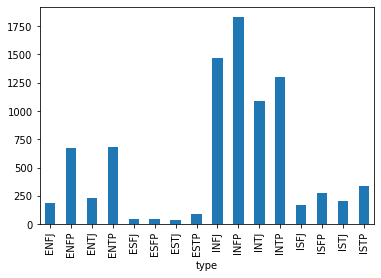

In [ ]:
#get a visual for the types
no_groups = df.groupby('type').count()
no_groups['posts'].plot(kind= 'bar')

In [ ]:
df.info

<bound method DataFrame.info of       type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1     ENTP  'i'm finding the lack of me in these posts ver...
2     INTP  'good one  _____   https://www.youtube.com/wat...
3     INTJ  'dear intp,   i enjoyed our conversation the o...
4     ENTJ  'you're fired.|||that's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edhb_h908||...
8671  ENFP  'so...if this thread already exists someplace ...
8672  INTP  'so many questions when i do these things.  i ...
8673  INFP  'i am very conflicted right now when it comes ...
8674  INFP  'it has been too long since i have been on per...

[8675 rows x 2 columns]>

In [ ]:
df['Distinct Posts'] = [i.split('|||') for i in df['posts']]
df['Distinct Posts']

0       ['http://www.youtube.com/watch?v=qsxhcwe3krw, ...
1       ['i'm finding the lack of me in these posts ve...
2       ['good one  _____   https://www.youtube.com/wa...
3       ['dear intp,   i enjoyed our conversation the ...
4       ['you're fired., that's another silly misconce...
                              ...                        
8670    ['https://www.youtube.com/watch?v=t8edhb_h908,...
8671    ['so...if this thread already exists someplace...
8672    ['so many questions when i do these things.  i...
8673    ['i am very conflicted right now when it comes...
8674    ['it has been too long since i have been on pe...
Name: Distinct Posts, Length: 8675, dtype: object

In [ ]:
df['Number of posts'] = df['Distinct Posts'].apply(len)
df.drop('Distinct Posts',inplace=True,axis=1)

In [ ]:
df = df[df['Number of posts']==50]


In [ ]:
#cleaning dataset
#remove puncutation 
import re
df['Posts'] = df['posts'].apply(lambda x: re.sub(r'https?:[?:A-Za-z0-9//_?.=/-]+', '', x.replace('|','')))
df['Posts']=df['Posts'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))
# removing special symbols
df['Posts']=df['Posts'].apply(lambda x: re.sub(r'[0-9,."\'*.?/\()@#!$%&^+]', '', x))
# removing repetitive multiple letter words and too long or too short words
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))
#df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'\s[\s+]','',x))
df.drop('posts',inplace=True,axis=1)
df.to_csv('mbti_cleaned.csv')

In [ ]:
data = pd.read_csv('mbti_cleaned.csv')
x = data['type']
data.drop(['Unnamed: 0', 'type'], axis = 1,inplace = True)
data['type'] = x
data

,Number of posts,Posts,type
0,50,intj moments sportscenter plays pra...,INFJ
1,50,finding lack these posts very alarmingsex...,ENTP
2,50,good _____ course which know; thats ...,INTP
3,50,dear intp enjoyed conversation other es...,INTJ
4,50,youre firedthats another silly misconception t...,ENTJ
...,...,...,...
7582,50,just because always think cats doms some...,ISFP
7583,50,soif this thread already exists someplace else...,ENFP
7584,50,many questions when these things would ta...,INTP
7585,50,very conflicted right when comes wanting ...,INFP


In [ ]:
data.dropna(inplace= True)

In [ ]:
# Creating a dataframe wherein each person and his personality type is a row and all the posts by him are the columns 
l2 = list(set(data['type']))
d = {}
count = 0
for ptype in l2:
    d[ptype] = ''
for pertype in data['type']:
    d[pertype] = d[pertype]+" "+ data.iloc[count,1]
    count+=1

In [ ]:
new_data = pd.DataFrame()
for i in d.keys():
    new_data.loc[i,'Posts']= d[i]
new_data

,Posts
INFP,think agree personally dont consider myse...
ESTJ,this such catch here although quite ter...
INFJ,intj moments sportscenter plays pr...
ISFP,they paint without numbersid guess istp toom...
ISTJ,newtons universal gravity mean seriously wh...
ESTP,splinter cell blacklist xbox estps generall...
ESFJ,just curious dont many esfj here esfj ...
ISFJ,love feeling affectionate love care c...
ENTJ,youre firedthats another silly misconception ...
ENFJ,stuff like disthey longer become outland...


In [ ]:
new_data['id'] = range(1,17)
new_data

,Posts,id
INFP,think agree personally dont consider myse...,1
ESTJ,this such catch here although quite ter...,2
INFJ,intj moments sportscenter plays pr...,3
ISFP,they paint without numbersid guess istp toom...,4
ISTJ,newtons universal gravity mean seriously wh...,5
ESTP,splinter cell blacklist xbox estps generall...,6
ESFJ,just curious dont many esfj here esfj ...,7
ISFJ,love feeling affectionate love care c...,8
ENTJ,youre firedthats another silly misconception ...,9
ENFJ,stuff like disthey longer become outland...,10


In [ ]:
# textual to numerical data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf  = TfidfVectorizer(sublinear_tf=True,min_df=1, ngram_range=(1, 2), stop_words='english')


In [ ]:
X = tfidf.fit_transform(new_data['Posts']).toarray()


Naive Bayes' Model 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
%matplotlib inline

In [ ]:
data = pd.read_csv("mbti_cleaned.csv")
data.dropna(inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['Posts'],data['type'], random_state=0)
cv = CountVectorizer()
tfidf = TfidfTransformer()

In [ ]:
x_train_counts = cv.fit_transform(x_train)
x_train_tfidf = tfidf.fit_transform(x_train_counts)

Hyperparameter alpha

In [ ]:
alpha = np.arange(0.00001,0.1,0.0001)
alpha = alpha[:50]
accuracy= []
for i in alpha:
    model = MultinomialNB(alpha = i)
    model.fit(x_train_tfidf,y_train)
    y_pred = model.predict(cv.transform(x_test))
    print("alpha is: ",i,"Accuracy is :",metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

alpha is:  1e-05 Accuracy is : 0.3131259884027412
alpha is:  0.00011 Accuracy is : 0.33473906167633105
alpha is:  0.00021 Accuracy is : 0.3415919873484449
alpha is:  0.00031000000000000005 Accuracy is : 0.34791776489193466
alpha is:  0.00041000000000000005 Accuracy is : 0.3526620980495519
alpha is:  0.00051 Accuracy is : 0.35318924617817604
alpha is:  0.0006100000000000001 Accuracy is : 0.3552978386926726
alpha is:  0.00071 Accuracy is : 0.35793357933579334
alpha is:  0.0008100000000000001 Accuracy is : 0.3574064312071692
alpha is:  0.0009100000000000001 Accuracy is : 0.3589878755930416
alpha is:  0.00101 Accuracy is : 0.3574064312071692
alpha is:  0.00111 Accuracy is : 0.35793357933579334
alpha is:  0.0012100000000000001 Accuracy is : 0.3589878755930416
alpha is:  0.0013100000000000002 Accuracy is : 0.35951502372166577
alpha is:  0.00141 Accuracy is : 0.35951502372166577
alpha is:  0.00151 Accuracy is : 0.35951502372166577
alpha is:  0.00161 Accuracy is : 0.3589878755930416
alpha is: 

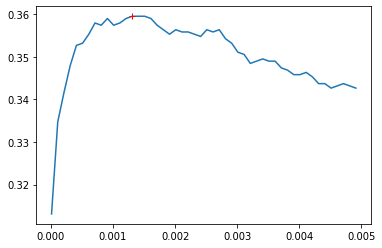

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alpha,accuracy)
plt.plot(alpha[accuracy.index(max(accuracy))],max(accuracy),"r+")
plt.show()

In [ ]:
print(max(accuracy))
alpha[accuracy.index(max(accuracy))]
#best alpha = 0.0013

0.35951502372166577


0.0013100000000000002

Naïve Bayesian classifier :  

In [ ]:
model = MultinomialNB(alpha = 0.0013)
model.fit(x_train_tfidf,y_train)
y_pred = model.predict(cv.transform(x_test))

In [ ]:
metrics.accuracy_score(y_test,y_pred) # model's Accuracy

0.3600421718502899

SVM model 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk

In [ ]:
data = pd.read_csv("mbti_cleaned.csv")

To extract significant characteristics from the data and submit it to the model for classification, we develop the TF-IDF Model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
data.dropna(inplace= True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['Posts'],data['type'], random_state=0)
c_v = CountVectorizer(stop_words="english")

In [ ]:
X_train_counts = c_v.fit_transform(x_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

Feeding the dataset to svm

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf,y_train)
y_pred = clf.predict(c_v.transform(x_test))

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred,target_names=data['type'].unique()))

              precision    recall  f1-score   support

        INFJ       0.50      0.24      0.33        45
        ENTP       0.45      0.62      0.52       134
        INTP       0.48      0.35      0.41        46
        INTJ       0.61      0.49      0.54       138
        ENTJ       0.80      0.50      0.62         8
        INFP       0.00      0.00      0.00         5
        ENFP       0.00      0.00      0.00         8
        ISFP       0.33      0.18      0.24        22
        ENFJ       0.61      0.65      0.63       325
        ISTP       0.56      0.89      0.68       402
        ISFJ       0.77      0.49      0.60       255
        ISTJ       0.76      0.60      0.67       300
        ESTP       0.91      0.44      0.60        45
        ESFP       0.70      0.22      0.34        63
        ESTJ       0.34      0.34      0.34        41
        ESFJ       0.57      0.55      0.56        60

    accuracy                           0.60      1897
   macro avg       0.52   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.accuracy_score(y_test,y_pred)*100)


60.094886663152344


hyper tuning

In [ ]:
C = np.arange(0.1,1,0.01)
accuracy=[]
for i in C:
    clf = LinearSVC(C=i).fit(X_train_tfidf,y_train)
    y_pred = clf.predict(c_v.transform(x_test))
    print("C is: ",i,"Accuracy is :",metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
clf = LinearSVC(C=0.1699).fit(X_train_tfidf,y_train)
y_pred = clf.predict(c_v.transform(x_test))

In [ ]:
metrics.accuracy_score(y_test,y_pred)*100   # best Accuracy 


58.777016341591995

Deep learning with CNN

In [ ]:
from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten, MaxPooling1D

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
vocab_size = 1000
max_len =1000
batch_size = 32
embedding_dims =10
filters = 16
ker_size = 3 # kernel size
hidden_dims = 250
epochs = 10

In [ ]:
data = pd.read_csv('mbti_cleaned.csv')
data.dropna(inplace=True)  # ignoring the NaN values

In [ ]:
isE = []
isS = []
isT = []
isJ = []

for p_type in data['type']:
  print(p_type) # string  --> 'INFJ'
  E = 1 if p_type[0] =='E' else 0
  isE.append(E)
  S = 1 if p_type[1] =='S' else 0
  isS.append(S)
  T = 1 if p_type[2] =='T' else 0
  isT.append(T)
  J = 1 if p_type[3] =='J' else 0
  isJ.append(J)

data['is E'] = isE
data['is S'] = isS
data['is T'] = isT
data['is J'] = isJ


In [ ]:
data.head()

,Unnamed: 0,type,Number of posts,Posts,is E,is S,is T,is J
0,0,INFJ,50,intj moments sportscenter plays pra...,0,0,0,1
1,1,ENTP,50,finding lack these posts very alarmingsex...,1,0,1,0
2,2,INTP,50,good _____ course which know; thats ...,0,0,1,0
3,3,INTJ,50,dear intp enjoyed conversation other es...,0,0,1,1
4,4,ENTJ,50,youre firedthats another silly misconception t...,1,0,1,1


In [ ]:
data.columns

Index(['Unnamed: 0', 'type', 'Number of posts', 'Posts', 'is E', 'is S',
       'is T', 'is J'],
      dtype='object')

In [ ]:
y = pd.DataFrame(data[['is E','is S','is T', 'is J']])
x_train,x_test,y_train,y_test = train_test_split(data['Posts'], y,random_state=0)
y

,is E,is S,is T,is J
0,0,0,0,1
1,1,0,1,0
2,0,0,1,0
3,0,0,1,1
4,1,0,1,1
...,...,...,...,...
7582,0,1,0,0
7583,1,0,0,0
7584,0,0,1,0
7585,0,0,0,0


In [ ]:
tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)

In [ ]:
x_train = tokenizer.texts_to_matrix(x_train)
x_test = tokenizer.texts_to_matrix(x_test)

In [ ]:
x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test = sequence.pad_sequences(x_test,maxlen=max_len)

Sequential Neural Network 

In [ ]:
model = Sequential()
# First we add an embedding layer 
model.add(Embedding(vocab_size,embedding_dims,input_length=max_len)) 
# Adding a 1D convolutional Layer
model.add(Conv1D(filters, ker_size, padding='valid', activation='relu'))
# Max Pooling the Convolutions
model.add(MaxPooling1D())
# Again Computing the Convolutions
model.add(Flatten())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Training the modeL
model.fit(x_train,y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test),)

Epoch 1/5
178/178 [==============================] - 8s 43ms/step - loss: 0.5455 - accuracy: 0.3121 - val_loss: 0.4889 - val_accuracy: 0.3337
Epoch 2/5
178/178 [==============================] - 7s 42ms/step - loss: 0.4497 - accuracy: 0.4244 - val_loss: 0.4697 - val_accuracy: 0.3890
Epoch 3/5
178/178 [==============================] - 7s 42ms/step - loss: 0.4008 - accuracy: 0.4773 - val_loss: 0.4816 - val_accuracy: 0.4918
Epoch 4/5
178/178 [==============================] - 7s 42ms/step - loss: 0.3637 - accuracy: 0.5076 - val_loss: 0.4586 - val_accuracy: 0.4344
Epoch 5/5
178/178 [==============================] - 8s 42ms/step - loss: 0.3270 - accuracy: 0.5334 - val_loss: 0.4731 - val_accuracy: 0.4555


In [ ]:
# Saving the model into a pickle file 
import pickle
pickle.dump(model,open('cnn_model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://06940251-33f9-4b33-aeb8-6386a94570aa/assets


In [ ]:
pickle.dump(tokenizer,open('tokenizer','wb'))

Single testing model:

In [ ]:
s ='confident, flexible personalities, who often enjoy taking charge in a situation.'
s = pd.Series(s)
s= tokenizer.texts_to_matrix(s)
s = sequence.pad_sequences(s)
l = model.predict(s)

In [ ]:
a,b= l[0][0]*(1/1999), l[0][1]*(1/1197)
a = a/(1/1999)+(1/1197)
b = b/(1/1999)+(1/1197)

In [ ]:
l = [a,b,l[0][2],l[0][3]]

In [ ]:
s=''
if l[0] >0.5:
    s +='E'
else:
    s+='I'
if l[1] >0.5:
    s+='S'
else:
    s+='N'
if l[2] >0.5:
    s+='T'
else:
    s+='F'
if l[3] >0.5:
    s+='J'
else:
    s+='P'
print('Your Personality is:',s)

Your Personality is: ISFP
